In [1]:
!pip install arff

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for arff: filename=arff-0.9-py3-none-any.whl size=4965 sha256=9440ab1d908957d8fcaf9eaef94223d7d23c85ff9bcce119ebe06c56cb5ec233
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\5e\d6\66\a25682c020fb563800fea1a06de58e4684243efd68cb83db83
Successfully built arff


In [11]:
import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff 


In [13]:
# data = arff.load(open("", "r"))["data"]
# X = [i[:-1] for i in data]

# data = arff.load(open('./phpMawTba.arff', 'r'))['data']
# X = [i[:4] for i in data]
# y = [i[-1] for i in data]

raw_data = loadarff('phpMawTba.arff')
df_data = pd.DataFrame(raw_data[0])
df_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,b'Private',226802.0,b'11th',7.0,b'Never-married',b'Machine-op-inspct',b'Own-child',b'Black',b'Male',0.0,0.0,40.0,b'United-States',b'<=50K'
1,38.0,b'Private',89814.0,b'HS-grad',9.0,b'Married-civ-spouse',b'Farming-fishing',b'Husband',b'White',b'Male',0.0,0.0,50.0,b'United-States',b'<=50K'
2,28.0,b'Local-gov',336951.0,b'Assoc-acdm',12.0,b'Married-civ-spouse',b'Protective-serv',b'Husband',b'White',b'Male',0.0,0.0,40.0,b'United-States',b'>50K'
3,44.0,b'Private',160323.0,b'Some-college',10.0,b'Married-civ-spouse',b'Machine-op-inspct',b'Husband',b'Black',b'Male',7688.0,0.0,40.0,b'United-States',b'>50K'
4,18.0,b'?',103497.0,b'Some-college',10.0,b'Never-married',b'?',b'Own-child',b'White',b'Female',0.0,0.0,30.0,b'United-States',b'<=50K'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,b'Private',257302.0,b'Assoc-acdm',12.0,b'Married-civ-spouse',b'Tech-support',b'Wife',b'White',b'Female',0.0,0.0,38.0,b'United-States',b'<=50K'
48838,40.0,b'Private',154374.0,b'HS-grad',9.0,b'Married-civ-spouse',b'Machine-op-inspct',b'Husband',b'White',b'Male',0.0,0.0,40.0,b'United-States',b'>50K'
48839,58.0,b'Private',151910.0,b'HS-grad',9.0,b'Widowed',b'Adm-clerical',b'Unmarried',b'White',b'Female',0.0,0.0,40.0,b'United-States',b'<=50K'
48840,22.0,b'Private',201490.0,b'HS-grad',9.0,b'Never-married',b'Adm-clerical',b'Own-child',b'White',b'Male',0.0,0.0,20.0,b'United-States',b'<=50K'


In [17]:
from scipy.io.arff import loadarff

In [27]:
df = pd.DataFrame(loadarff("phpMawTba.arff")[0])

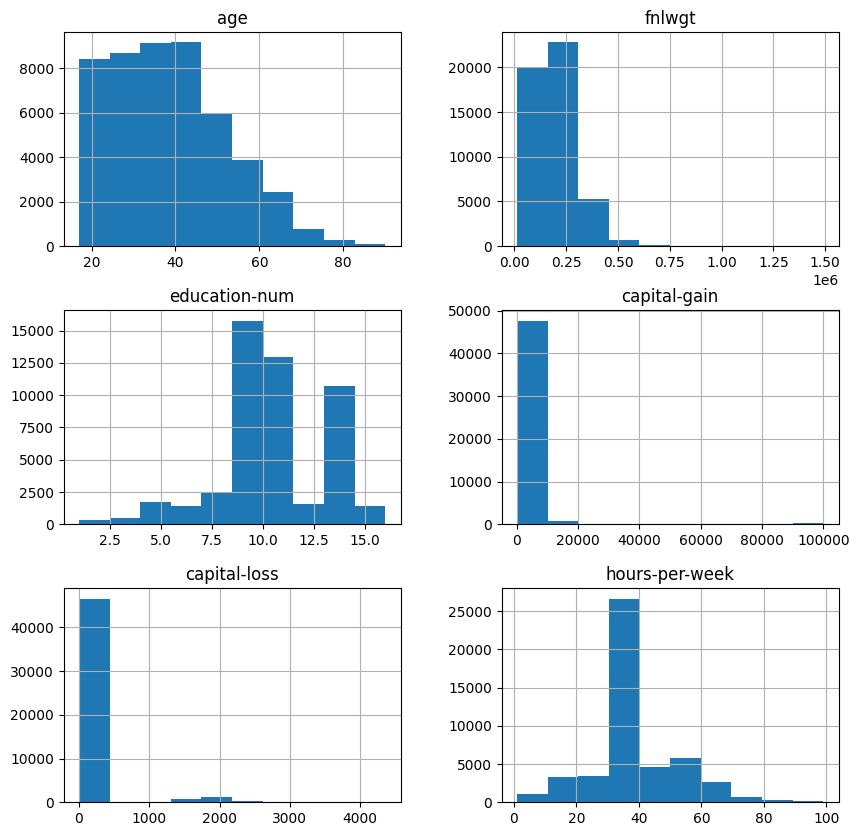

In [31]:
df.hist(figsize=(10, 10));

In [37]:
target_name = "class"
target = df[target_name]
target

0        b'<=50K'
1        b'<=50K'
2         b'>50K'
3         b'>50K'
4        b'<=50K'
           ...   
48837    b'<=50K'
48838     b'>50K'
48839    b'<=50K'
48840    b'<=50K'
48841     b'>50K'
Name: class, Length: 48842, dtype: object

In [48]:
numeric_column = ["age", "capital-gain", "capital-loss","hours-per-week"]

feature = df.drop(columns=[target_name])[numeric_column]
feature.columns

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
model = KNeighborsClassifier()
# model.fit(feature, target)
target = target.apply(lambda x: x.decode("utf-8"))

model.fit(feature, target)

KNeighborsClassifier()

In [56]:
predicted_data = model.predict(feature)

In [57]:
(predicted_data == target).mean()

0.8141558494738135

In [61]:
from sklearn.model_selection import train_test_split

In [70]:
feature_training, feature_test, target_training, target_test = train_test_split(feature, target, test_size=0.3, random_state=82)

In [72]:
_ = model.fit(feature_training, target_training)

In [74]:
accuracy_training = (model.predict(feature_training) == target_training).mean()
print(f"Accuracy: {accuracy_training}")

Accuracy: 0.8194448506829682


In [76]:
model.score(feature_test, target_test)

0.8093223230737733

In [78]:
model = KNeighborsClassifier(n_neighbors=50)
_ = model.fit(feature_training, target_training)

In [80]:
predicted_result = model.predict(feature_training[:5])
predicted_result

array(['<=50K', '<=50K', '<=50K', '<=50K', '<=50K'], dtype=object)

In [81]:
predicted_result == target_training[:5]

25937     True
38148     True
47757     True
15841    False
26555     True
Name: class, dtype: bool

In [82]:
predicted_result = model.predict(feature_training)
(predicted_result == target_training).mean()

0.8276931176694259

In [83]:
model.score(feature_test, target_test)

0.8250187674878864

In [9]:
from scipy.io.arff import loadarff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.DataFrame(loadarff("phpMawTba.arff")[0])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,b'Private',226802.0,b'11th',7.0,b'Never-married',b'Machine-op-inspct',b'Own-child',b'Black',b'Male',0.0,0.0,40.0,b'United-States',b'<=50K'
1,38.0,b'Private',89814.0,b'HS-grad',9.0,b'Married-civ-spouse',b'Farming-fishing',b'Husband',b'White',b'Male',0.0,0.0,50.0,b'United-States',b'<=50K'
2,28.0,b'Local-gov',336951.0,b'Assoc-acdm',12.0,b'Married-civ-spouse',b'Protective-serv',b'Husband',b'White',b'Male',0.0,0.0,40.0,b'United-States',b'>50K'
3,44.0,b'Private',160323.0,b'Some-college',10.0,b'Married-civ-spouse',b'Machine-op-inspct',b'Husband',b'Black',b'Male',7688.0,0.0,40.0,b'United-States',b'>50K'
4,18.0,b'?',103497.0,b'Some-college',10.0,b'Never-married',b'?',b'Own-child',b'White',b'Female',0.0,0.0,30.0,b'United-States',b'<=50K'


In [39]:
decode_feature = ["workclass", "education", "marital-status", "occupation", "race", "sex", "native-country", "class"]

for label in decode_feature:
    df[label] = df[label].apply(lambda x: x.decode("utf-8"))
    
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,b'Own-child',Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,b'Husband',White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,b'Husband',White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,b'Husband',Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18.0,?,103497.0,Some-college,10.0,Never-married,?,b'Own-child',White,Female,0.0,0.0,30.0,United-States,<=50K


In [40]:
df.dtypes

age               float64
workclass          object
fnlwgt            float64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
class              object
dtype: object

In [41]:
df["capital-gain"] = df["capital-gain"] / df["capital-gain"].mean()

In [42]:
df["fnlwgt"] = df["fnlwgt"] / df["fnlwgt"].mean()

In [43]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,Private,1.195809,11th,7.0,Never-married,Machine-op-inspct,b'Own-child',Black,Male,0.000000,0.0,40.0,United-States,<=50K
1,38.0,Private,0.473542,HS-grad,9.0,Married-civ-spouse,Farming-fishing,b'Husband',White,Male,0.000000,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,1.776567,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,b'Husband',White,Male,0.000000,0.0,40.0,United-States,>50K
3,44.0,Private,0.845300,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,b'Husband',Black,Male,7.124669,0.0,40.0,United-States,>50K
4,18.0,?,0.545686,Some-college,10.0,Never-married,?,b'Own-child',White,Female,0.000000,0.0,30.0,United-States,<=50K


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def prepare_data(df):
    numerical_features = ["age", "fnlwgt", "capital-gain", "capital-loss", "hours-per-week"]
    
    data = df[numerical_features]
    target = df["class"]
    
    return data, target



data, label = prepare_data(df)
X_train, X_val, y_train, y_val = train_test_split(data, label, test_size=.2, random_state=82)

In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
val_predictions = model.predict(X_train[:10])
val_predictions

array(['<=50K', '<=50K', '<=50K', '<=50K', '>50K', '<=50K', '<=50K',
       '<=50K', '<=50K', '<=50K'], dtype=object)

In [49]:
val_predictions = model.predict(X_train)
(val_predictions == y_train).mean()

0.8006039976454329

In [51]:
model.score?
val_predictions = model.predict(X_val)
model.score(y_val, val_predictions)


C:\Users\ADMIN\anaconda3\envs\DSCoursera\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: '<=50K'